<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Advance-Natural-Language-Processing/blob/main/%5BNemat_Aloush_J41332c%5D_HW1_optional_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

### from part 1

In [2]:
import pandas as pd
import csv
from bs4 import BeautifulSoup
# BeautifulSoup: This library helps us to get the HTML structure of the page that we want to work with. 
# We can then, use its functions to access specific elements and extract relevant information.
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet,stopwords, words
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm
import spacy
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import html
# Following downloads can be runed for once
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
nlp = spacy.load('en_core_web_sm') 

In [3]:
table = str.maketrans('', '', string.punctuation)
def clean_non_alphabitcs(html_text):
    # parse html content
    #no_html = BeautifulSoup(html.unescape(html_text), "html.parser").text
    no_punc=html_text.translate(table)
    no_enter = re.sub(r'\n+', '\n', no_punc) # no enters
    no_num = re.sub(r'\d+', '', no_enter) # no numbers
    no_asci=re.sub(r'[^\x00-\x7f]',r' ',no_num) # non asci
    return no_asci.lower().strip()

In [98]:
words = set(nltk.corpus.words.words())
def nlp_process(data):
    doc = nlp(data)
    lemmas = []
    for token in doc:
        if token.lang_ == 'en' and token.pos_ != 'SPACE' and not token.is_stop: #Checking if the word is in the dictionary (meaningful english world)
            lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [99]:
def total_pipeline(html_text):
    return nlp_process(clean_non_alphabitcs(html_text))

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [4]:
import pandas as pd

In [5]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [100]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')

In [ ]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [101]:
df['text'] = df['text'].apply((total_pipeline))

In [102]:
df.head()

,id,text,author
0,id26305,process afford means ascertain dimension dunge...,EAP
1,id17569,occur fumbling mere mistake,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,lovely spring look windsor terrace sixteen fer...,MWS
4,id12958,find gold superintendent abandon attempt perpl...,HPL


In [103]:
df.to_csv('/content/drive/MyDrive/data/data_processed.csv')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/data_processed.csv')

In [7]:
df.shape

(19579, 4)

In [8]:
df=df.dropna()

In [9]:
df.shape

(19553, 4)

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [10]:
import gensim.corpora as corpora
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

def coherence(id2word, tokens, model):
    # Create Dictionary
    #id2word = corpora.Dictionary(tokens)
    # Create Corpus
    #texts = tokens
    # Term Document Frequency
    #corpus = [id2word.doc2bow(text) for text in texts]  
    cm = CoherenceModel(model=model, \
    texts=tokens,  #train_tokens
    dictionary=id2word, 
    coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value
    return coherence

In [15]:
def pmi(id2word, tokens, model):
  npmi = CoherenceModel(model=model, \
    texts=tokens, 
    dictionary=id2word,
    coherence='c_npmi')
  coherence = npmi.get_coherence()  # get coherence value
  return coherence

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [11]:
from sklearn import model_selection
X = df['text']
y = df['author']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15642,), (3911,), (15642,), (3911,))

In [57]:
X_test.head()

15445                                                 bury
17943                find matter exceed difficulty squeeze
7271               indubitably equal time actual sepulture
14042                   dye know young sir be right sot un
10507    death apparent cause probably excitement exposure
Name: text, dtype: object

In [12]:
train_tokens = [text.split() for text in X_train.to_list()]
# Create Dictionary
id2word = corpora.Dictionary(train_tokens)
# Create Corpus
texts = train_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  

In [43]:
test_tokens = [text.split() for text in X_test.to_list()]
# Create Dictionary
id2word_test = corpora.Dictionary(train_tokens)
# Create Corpus
texts_test = train_tokens
# Term Document Frequency
corpus_test = [id2word_test.doc2bow(text) for text in texts_test]  

Plot the histogram of resulting tokens counts in the processed datasets.

In [119]:
frequents_train=[]
for value in X_train.values:
  frequents_train.append(len(value.split()))

In [120]:
frequents_test=[]
for value in X_test.values:
  frequents_test.append(len(value.split()))

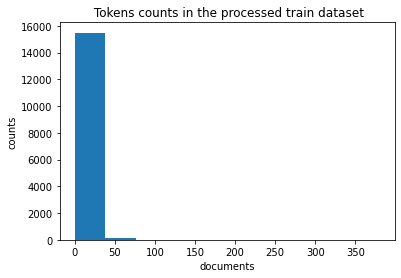

In [133]:
plt.title(" Tokens counts in the processed train dataset")
plt.hist(frequents_train)
plt.ylabel('counts')
plt.xlabel('documents')
plt.show()

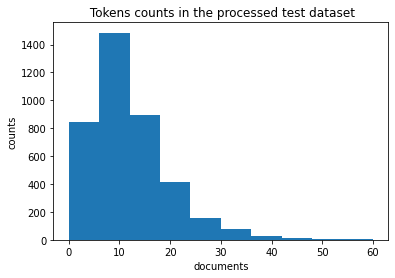

In [136]:
plt.title(" Tokens counts in the processed test dataset")
plt.hist(frequents_test)
plt.ylabel('counts')
plt.xlabel('documents')
plt.show()

In [48]:
most_frequent_test=pd.Series(' '.join(X_test.values).split()).value_counts()[:100]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


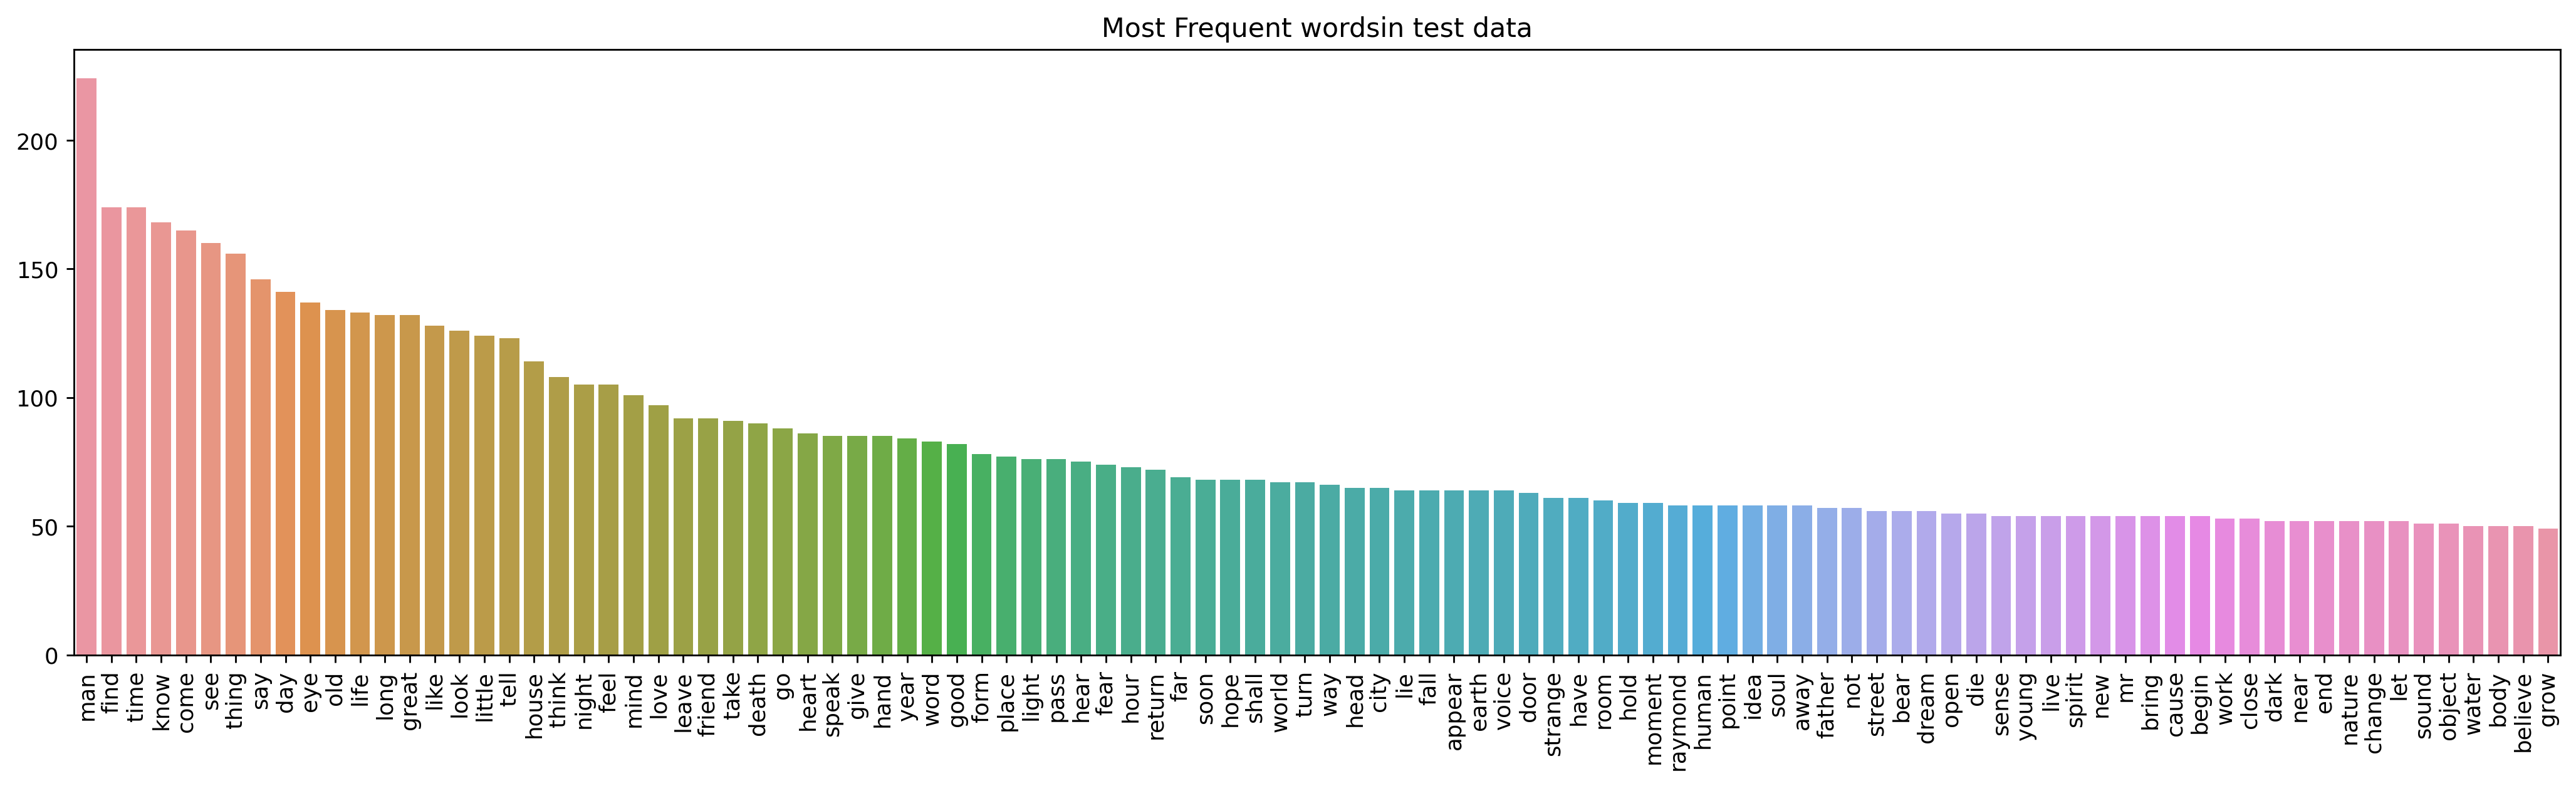

In [52]:
x = most_frequent_test.index
y = most_frequent_test
figure(num=None, figsize=(20,5), dpi=256, facecolor='w', edgecolor='r')
plt.title("Most Frequent wordsin test data")
g=sns.barplot(x, y)
g.set_xticklabels(x,rotation=90) 
plt.show()

In [50]:
most_frequent_train=pd.Series(' '.join(X_train.values).split()).value_counts()[:100]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


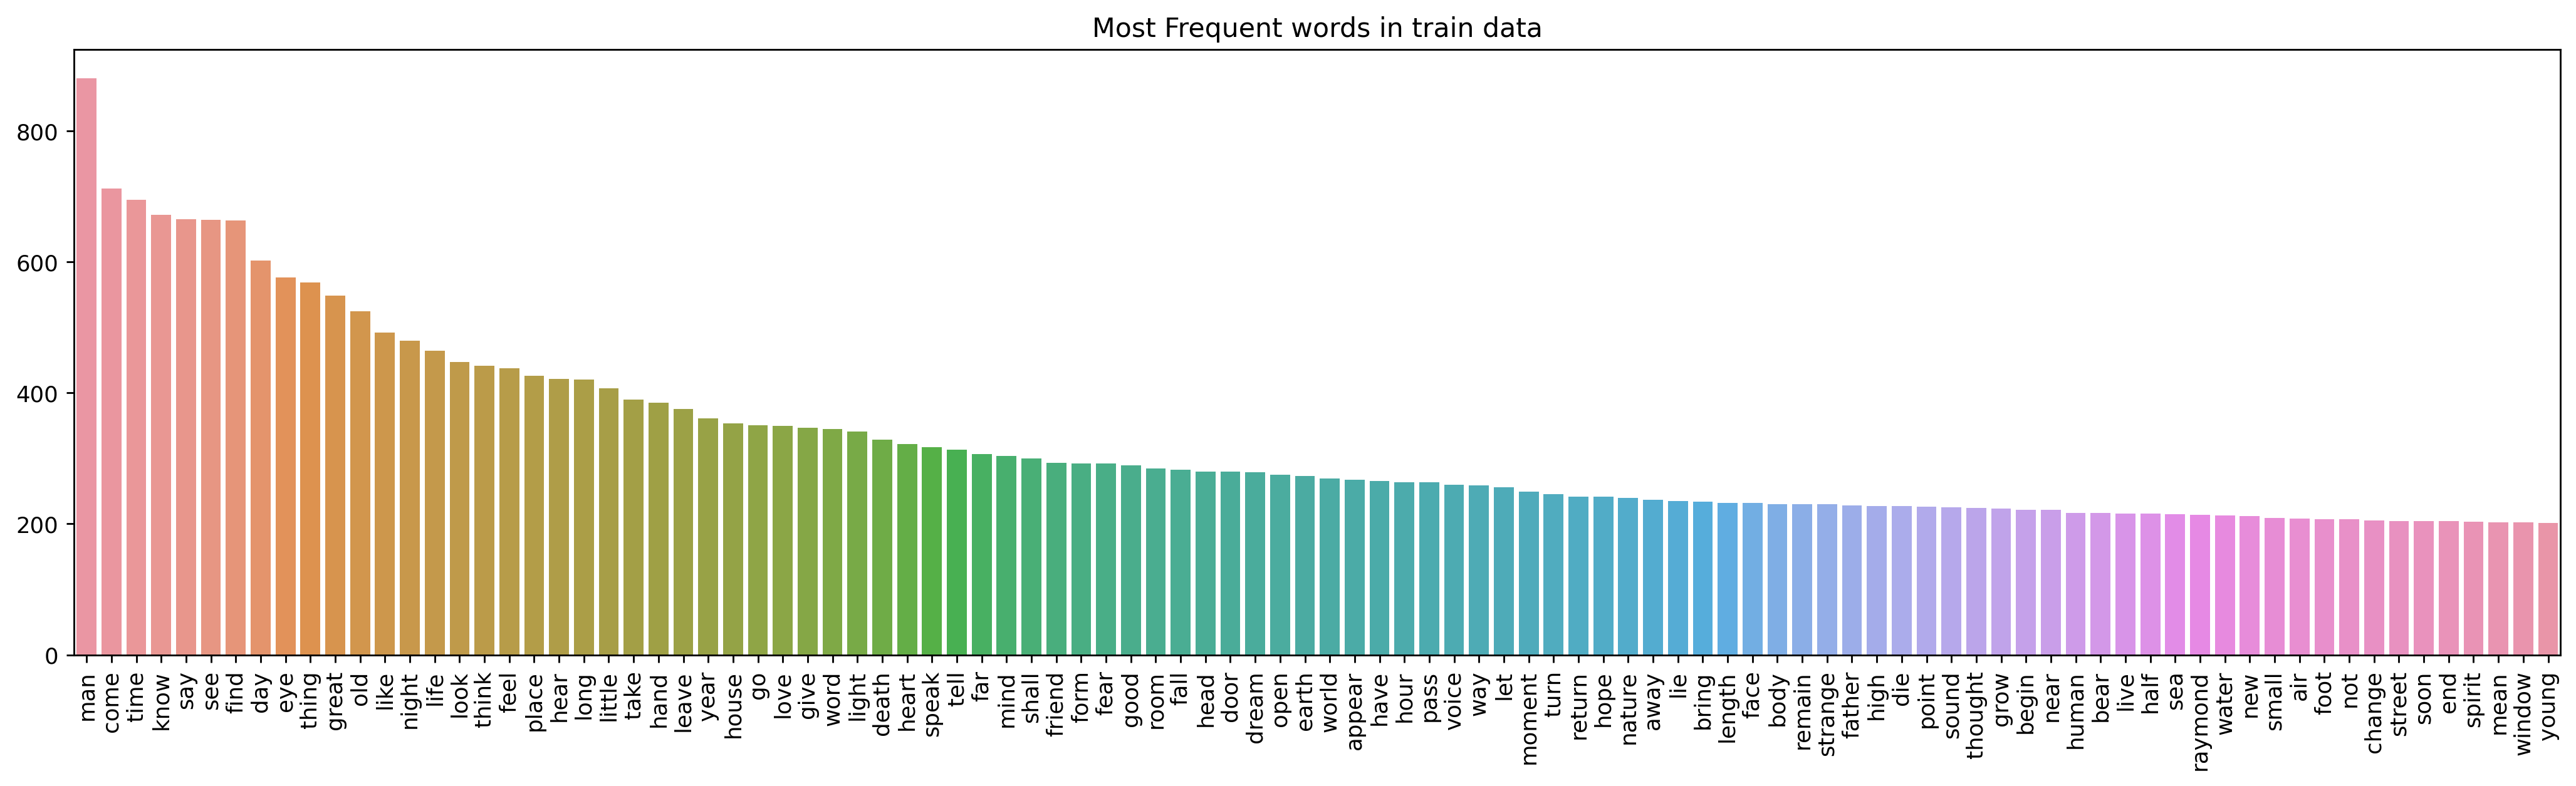

In [53]:
x = most_frequent_train.index
y = most_frequent_train
figure(num=None, figsize=(20,5), dpi=256, facecolor='w', edgecolor='r')
plt.title("Most Frequent words in train data")
g=sns.barplot(x, y)
g.set_xticklabels(x,rotation=90) 
plt.show()

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [142]:
pip install -U gensim

     |████████████████████████████████| 24.1 MB 70.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [13]:
from gensim.models import Nmf
nmf = Nmf(corpus=corpus, \
          id2word=id2word,
          num_topics=3,
          random_state=42,
          chunksize=100)

doc_nmf = nmf[corpus]

In [37]:
nmf_co=coherence(id2word,train_tokens,nmf)
print('Coherence score:',nmf_co )

Coherence score: 0.34638480989460224


In [38]:
nmf_pmi=pmi(id2word,train_tokens,nmf)
print('normalized pmi score:', nmf_pmi) 

normalized pmi score: -0.02884531945812062


#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [23]:
from gensim.models.ldamodel import LdaModel
lda = LdaModel(corpus=corpus, 
    id2word=id2word, 
    num_topics=3,
    random_state=42,
    alpha='auto',
    per_word_topics=True)

doc_lda = lda[corpus]

In [31]:
lda_co=coherence(id2word,train_tokens,lda)
print('Coherence score:', lda_co)

Coherence score: 0.2272081643367446


In [32]:
lda_pmi=pmi(id2word,train_tokens,lda)
print('normalized pmi score:', lda_pmi) 

normalized pmi score: -0.03914262532859251


### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')

In [30]:
cv

CountVectorizer(max_features=1000, stop_words='english')

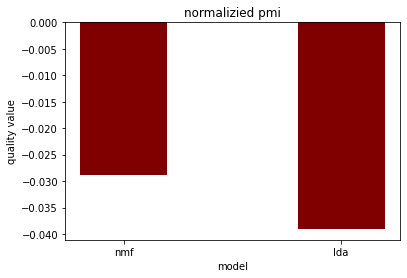

In [41]:
x=["nmf","lda",]
y=[nmf_pmi,lda_pmi]
plt.bar(x, y, color ='maroon',
        width = 0.4) 
plt.xlabel("model")
plt.ylabel("quality value")
plt.title("normalizied pmi")
plt.show()

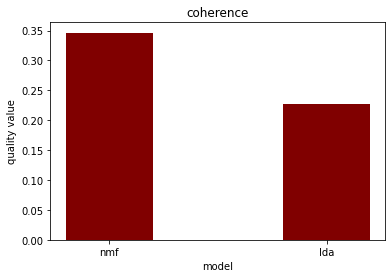

In [42]:
x=["nmf","lda"]
y=[nmf_co,lda_co]
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.xlabel("model")
plt.ylabel("quality value")
plt.title("coherence")
plt.show()